In [1]:
## IMPORTING IMP LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data
df=pd.read_csv('D:/SKILLVERTEX/startup_funding.csv',parse_dates=['Date dd/mm/yyyy'])
dff=df.rename({'Date dd/mm/yyyy':'Date'},axis=1)
dff.drop(["Sr No"],inplace=True,axis = 1)

In [3]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               3044 non-null   object
 1   Startup Name       3044 non-null   object
 2   Industry Vertical  2873 non-null   object
 3   SubVertical        2108 non-null   object
 4   City  Location     2864 non-null   object
 5   Investors Name     3020 non-null   object
 6   InvestmentnType    3040 non-null   object
 7   Amount in USD      2084 non-null   object
 8   Remarks            419 non-null    object
dtypes: object(9)
memory usage: 214.2+ KB


In [4]:
dff.columns

Index(['Date', 'Startup Name', 'Industry Vertical', 'SubVertical',
       'City  Location', 'Investors Name', 'InvestmentnType', 'Amount in USD',
       'Remarks'],
      dtype='object')

## Data Preprocessing

In [5]:
# lets clean the strings
def clean_string(x):
    return str(x).replace("\\xc2\\xa0","").replace("\\\\xc2\\\\xa0", "")

# lets apply the function to clean the data
for col in ['Startup Name', 'Industry Vertical', 'SubVertical',
       'City  Location', 'Investors Name', 'InvestmentnType', 'Amount in USD',
       'Remarks']:
    dff[col] = dff[col].apply(lambda x: clean_string(x))
    
# lets check the head of the data
dff.head()

,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan
1,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan
2,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",nan
3,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",nan
4,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",nan


In [6]:
## Cleaning the dates

dff['Date'][dff['Date']=='12/05.2015'] = '12/05/2015'
dff['Date'][dff['Date']=='13/04.2015'] = '13/04/2015'
dff['Date'][dff['Date']=='15/01.2015'] = '15/01/2015'
dff['Date'][dff['Date']=='22/01//2015'] = '22/01/2015'
dff['Date'][dff['Date']=='05/072018'] = '05/07/2018'
dff['Date'][dff['Date']=='01/07/015'] = '01/07/2015'
dff['Date'][dff['Date']=='\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'

In [7]:
# lets calculate the total missing values in the data
dff.isnull().sum().sort_values(ascending = False)

Remarks              0
Amount in USD        0
InvestmentnType      0
Investors Name       0
City  Location       0
SubVertical          0
Industry Vertical    0
Startup Name         0
Date                 0
dtype: int64

### Feature engineering

In [8]:
# converting them into a Datetime object
dff["yearmonth"] = (pd.to_datetime(dff['Date'],
         format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(dff['Date'],format='%d/%m/%Y').dt.month)
dff.head(2)

,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks,yearmonth
0,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan,202001
1,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan,202001


# EDA

In [13]:
# check top 10 date having high startup_funding
temp = dff['yearmonth'].value_counts().sort_values(ascending = False).head(10)
temp

201601    104
201602    100
201508     98
201507     98
201606     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: yearmonth, dtype: int64

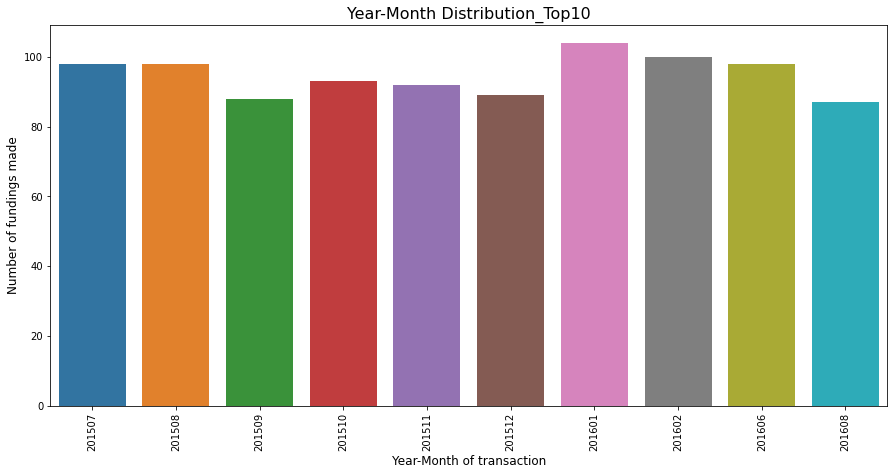

In [19]:
# lets plot the data
plt.rcParams['figure.figsize'] = (15, 7)
sns.barplot(temp.index,temp.values)
plt.xticks(rotation = 90)
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution_Top10", fontsize=16)
plt.show()

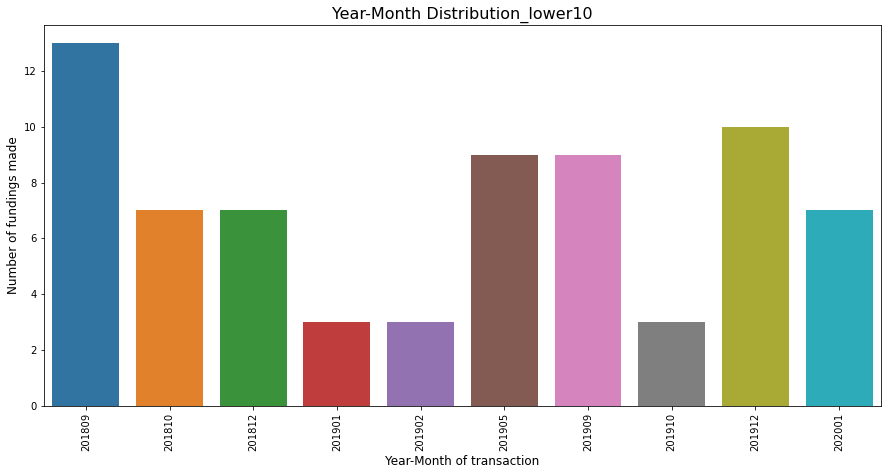

In [20]:
# check lower 10 date having high startup_funding
tem= dff['yearmonth'].value_counts().tail(10)
# lets plot the data
plt.rcParams['figure.figsize'] = (15, 7)
sns.barplot(tem.index,tem.values)
plt.xticks(rotation = 90)
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution_lower10", fontsize=16)
plt.show()

In [22]:
# lets convert the amount column into numerical, so that we can analyze the values inside it

# function to clean the AmounInUsd Column
def clean_amount(x):
    x = ''.join([c for c in str(x) if c in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']])
    x = str(x).replace(",","").replace("+","")
    x = str(x).lower().replace("undisclosed","")
    x = str(x).lower().replace("n/a","")
    if x == '':
        x = '-999'
    return x

# lets apply the function on the column
dff["AmountInUSD"] = dff['Amount in USD'].apply(lambda x: float(clean_amount(x)))

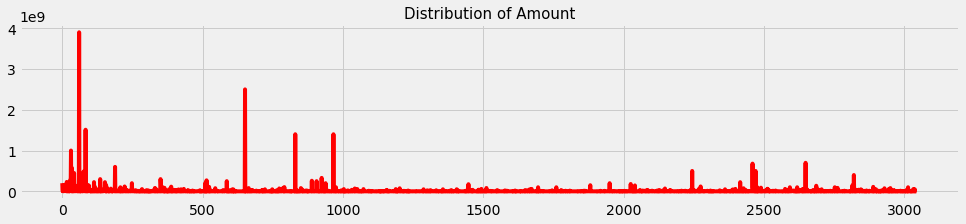

In [24]:
# lets check the head of the column after cleaning it
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 3)
dff['AmountInUSD'].plot(kind = 'line', color = 'red')
plt.title('Distribution of Amount', fontsize = 15)
plt.show()

In [25]:
# lets check the Maximum and minimum funding of a startup
print("Maximum funding to a Startups is : ", dff["AmountInUSD"].dropna().sort_values().max())
print("Maximum funding to a Startups is : ", dff["AmountInUSD"].dropna().sort_values().min())


Maximum funding to a Startups is :  3900000000.0
Maximum funding to a Startups is :  -999.0


In [28]:
A=dff['City  Location'].value_counts().head(15)
A

Bangalore    701
Mumbai       568
New Delhi    424
Gurgaon      291
nan          180
Bengaluru    141
Pune         105
Hyderabad     99
Chennai       97
Noida         93
Gurugram      50
Ahmedabad     38
Delhi         34
Jaipur        30
Kolkata       21
Name: City  Location, dtype: int64

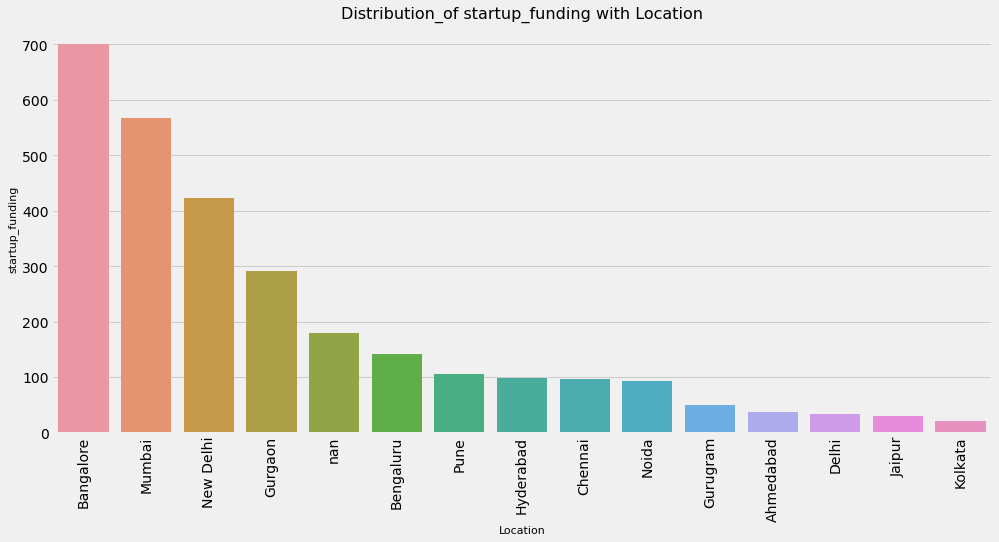

In [29]:
# lets plot the data
plt.rcParams['figure.figsize'] = (15, 7)
sns.barplot(A.index,A.values)
plt.xticks(rotation = 90)
plt.xlabel('Location',fontsize=11)
plt.ylabel('startup_funding',fontsize=11)
plt.title("Distribution_of startup_funding with Location", fontsize=16)
plt.show()

In [30]:
B=dff['City  Location'].value_counts().tail(15)
B

Hyderabad/USA            1
Pune / Singapore         1
Taramani                 1
Mumbai / UK              1
India                    1
New York, Bengaluru      1
Noida / Singapore        1
US/India                 1
Andheri                  1
Seattle / Bangalore      1
Chembur                  1
Haryana                  1
Tulangan                 1
Bangalore / Palo Alto    1
Pune / Dubai             1
Name: City  Location, dtype: int64

In [32]:
dff.columns

Index(['Date', 'Startup Name', 'Industry Vertical', 'SubVertical',
       'City  Location', 'Investors Name', 'InvestmentnType', 'Amount in USD',
       'Remarks', 'yearmonth', 'AmountInUSD'],
      dtype='object')

In [51]:
# lets check the startups with least funding
dff[['Date','Startup Name','Amount in USD','Investors Name']].sort_values(by = 'Amount in USD', ascending =True).head(5)

,Date,Startup Name,Amount in USD,Investors Name
31,25/11/2019,Paytm,"1,00,00,00,000",Vijay Shekhar Sharma
1991,24/02/2016,NoBroker,"1,00,00,000","Beenext, Digital Garage, Beenos, Qualgro, Mamo..."
1061,12/01/2017,Square Yards,"1,00,00,000","Lohia Group, Andre Hoffman"
2862,28/04/2015,Babajobs,"1,00,00,000",SEEK Ltd & affiliates
2381,31/10/2015,Jugnoo,"1,00,00,000",Paytm


In [45]:
# Average Funding 
print("On Average indian startups got funding of : ", dff["AmountInUSD"].dropna().sort_values().mean())

# max mode Funding 
print("On max indian startups got funding of : ", dff["AmountInUSD"].dropna().sort_values().mode())


On Average indian startups got funding of :  13270058.261169514
On max indian startups got funding of :  0   -999.0
dtype: float64


In [59]:
# # lets check the no. of funding each startsup got
str_month = dff['Startup Name'].value_counts().head(15)
str_month

Swiggy           8
Ola Cabs         8
Paytm            7
Nykaa            6
NoBroker         6
UrbanClap        6
Meesho           6
Medinfi          6
Uniphore         5
Jugnoo           5
Toppr            5
Capital Float    5
Grofers          5
Flipkart         5
Moglix           5
Name: Startup Name, dtype: int64

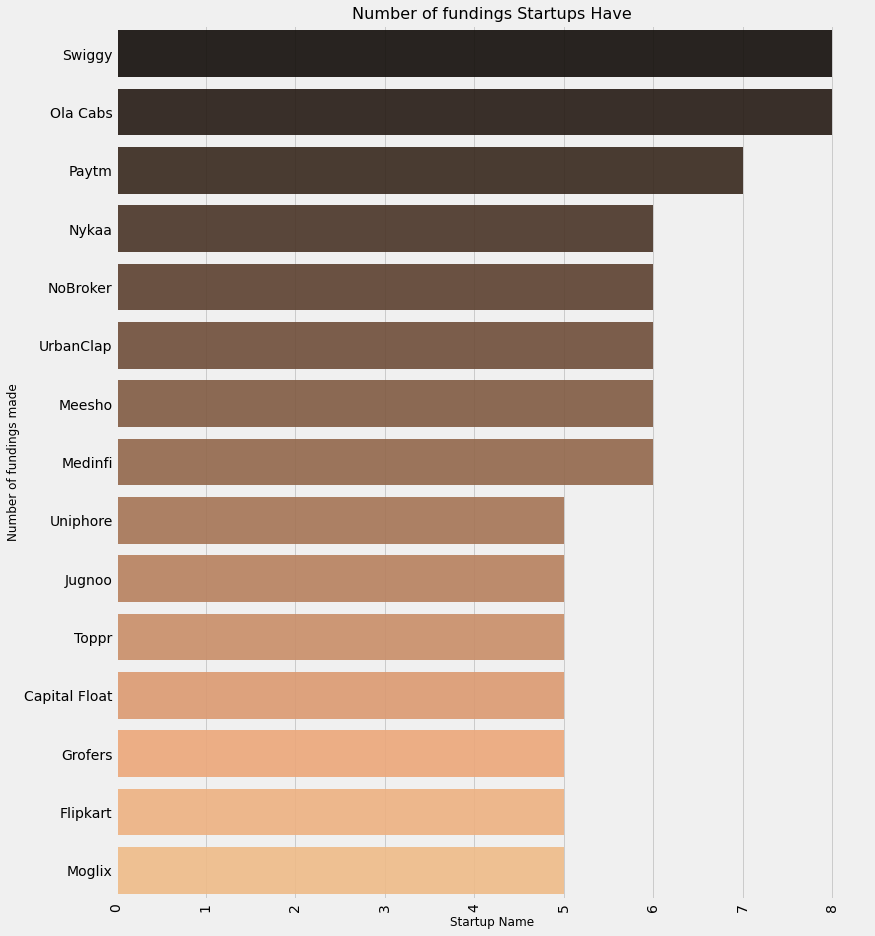

In [60]:
plt.rcParams['figure.figsize'] = (12, 15)
sns.barplot(y = str_month.index, x =str_month.values, alpha=0.9, palette = 'copper')
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of fundings Startups Have", fontsize=16)
plt.show()

In [64]:
dff.columns

Index(['Date', 'Startup Name', 'Industry Vertical', 'SubVertical',
       'City  Location', 'Investors Name', 'InvestmentnType', 'Amount in USD',
       'Remarks', 'yearmonth', 'AmountInUSD'],
      dtype='object')

Consumer Internet      941
Technology             478
eCommerce              186
Consumer Technology    172
Healthcare              70
Finance                 62
ECommerce               61
Logistics               32
E-Commerce              29
Education               24
Name: Industry Vertical, dtype: int64


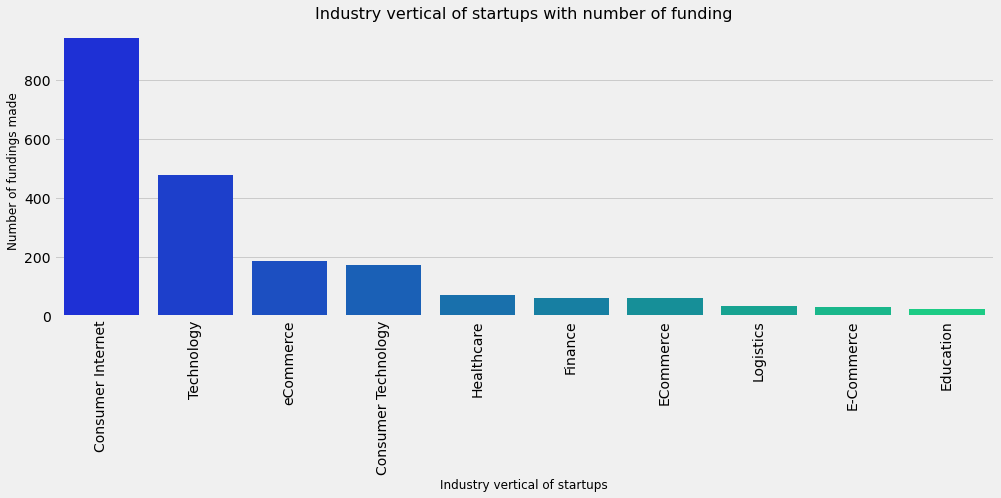

In [66]:
# lets analyze the Industry of the Startups

# data cleaning
dff['Industry Vertical'] = dff['Industry Vertical'].replace('nan', 'Consumer Technology')

industry = dff['Industry Vertical'].value_counts().head(10)
print(industry)

# lets plot the data
plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(industry.index, industry.values, palette = 'winter')
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

Online Lending Platform                          11
Online Pharmacy                                  10
Food Delivery Platform                            8
Online Lending                                    5
Online Learning Platform                          5
Online Education Platform                         5
Online lending platform                           5
Education                                         5
Online Food Delivery                              4
Non-Banking Financial Company                     4
Online Marketplace                                3
ECommerce Marketplace                             3
Online Food Delivery Platform                     3
Data Analytics platform                           3
Online platform for Higher Education Services     3
Online learning platform                          3
E-learning                                        3
Fitness Mobile App                                3
Agri-tech                                         3
Online Insur

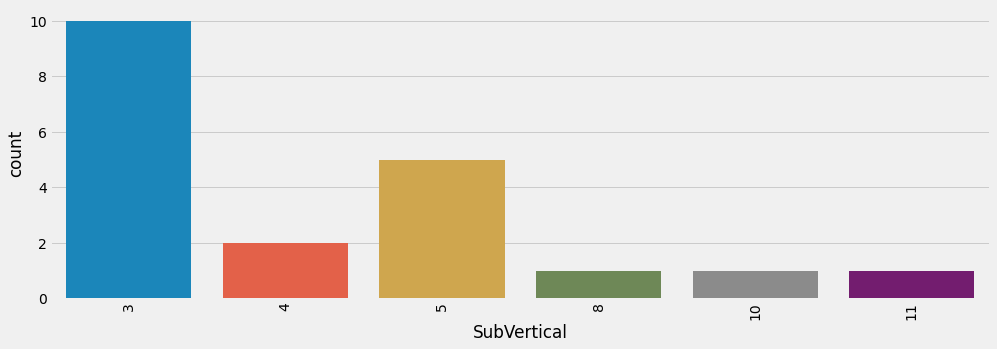

In [70]:
# lets analyze the sub vertical industries
industry = dff['SubVertical'].value_counts()[1:].head(20)
print(industry)
sns.countplot(industry)

<AxesSubplot:ylabel='SubVertical'>

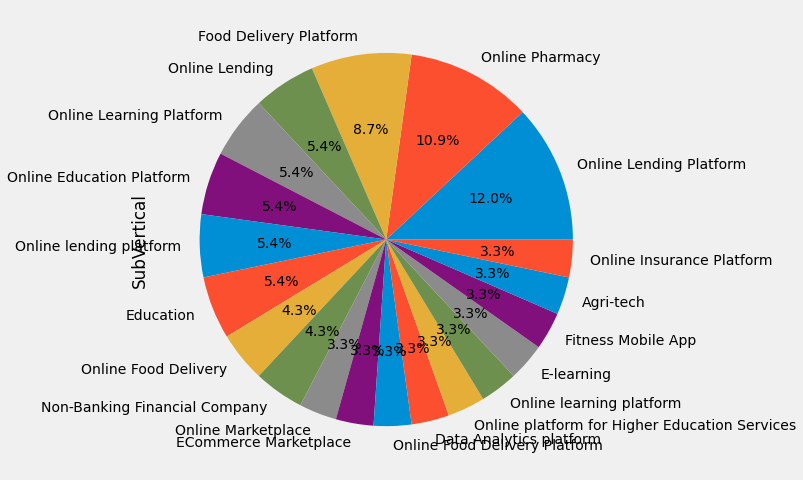

In [73]:
# lets analyze the sub vertical industries
plt.figure(figsize=(10,8))
industry.plot.pie(autopct='%1.1f%%')

In [72]:
# lets check the value counts
# lets analyze the investors on startups
investors = dff['Investors Name'].value_counts().head(10)
print(investors)

Undisclosed Investors       39
Undisclosed investors       30
Ratan Tata                  25
nan                         24
Indian Angel Network        24
Kalaari Capital             16
Sequoia Capital             15
Group of Angel Investors    15
Undisclosed Investor        12
Accel Partners              12
Name: Investors Name, dtype: int64


<AxesSubplot:ylabel='Investors Name'>

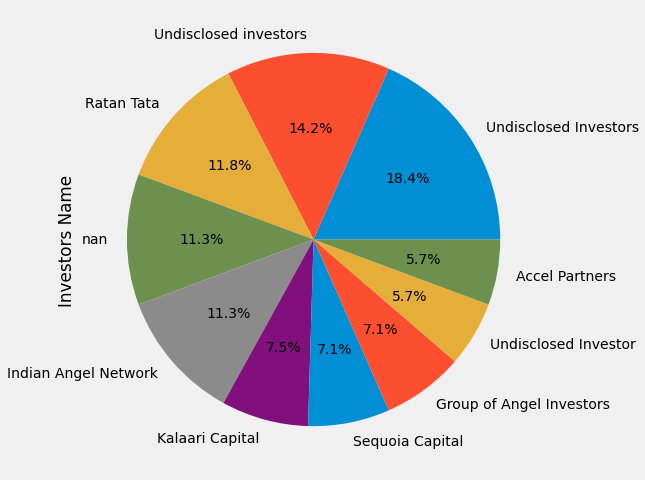

In [84]:
# lets analyze the investors on startups
plt.figure(figsize=(10,8))
investors.plot.pie(autopct='%1.1f%%')

Private Equity          1357
Seed Funding            1355
Seed/ Angel Funding       60
Seed / Angel Funding      47
Seed\\nFunding            30
Debt Funding              25
Series A                  24
Seed/Angel Funding        23
Series B                  20
Series C                  14
Series D                  12
Angel / Seed Funding       8
Seed Round                 7
Private Equity Round       4
Pre-Series A               4
Name: InvestmentnType, dtype: int64


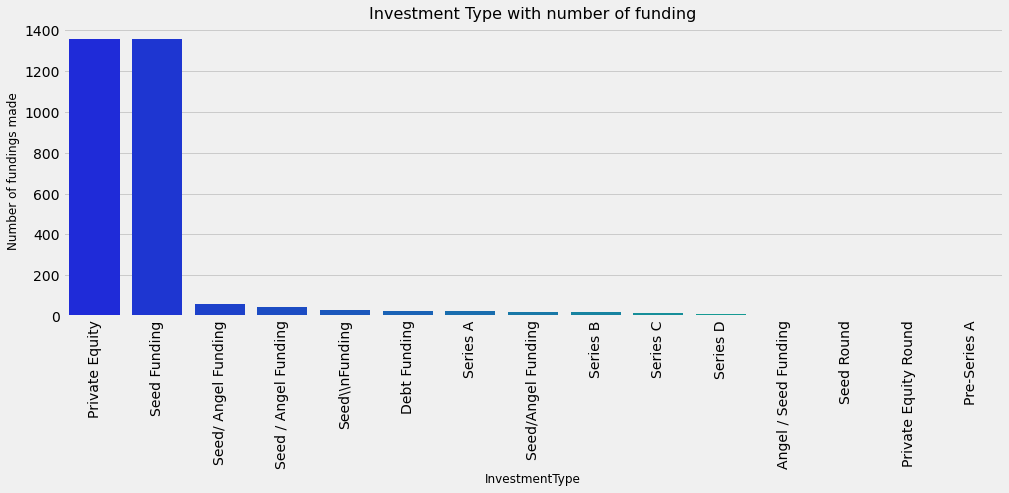

<AxesSubplot:ylabel='Investors Name'>

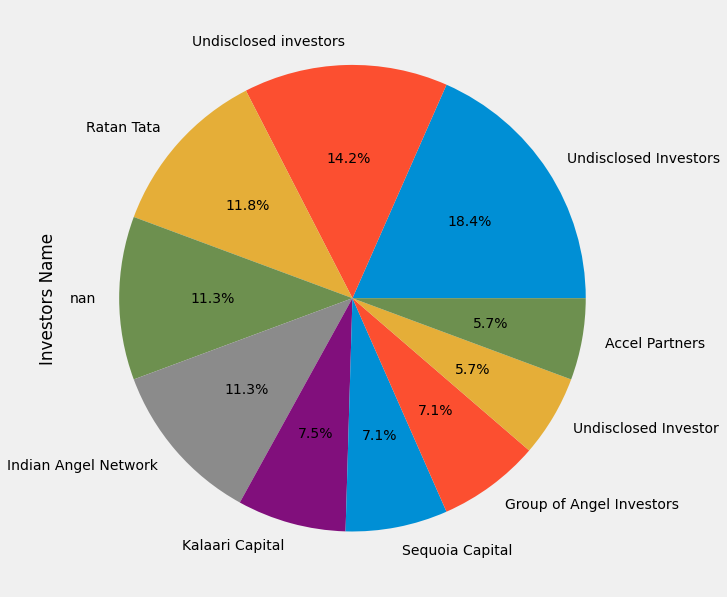

In [92]:
# lets analyze the investment
investment = dff['InvestmentnType'].value_counts().head(15)
print(investment)

# lets clean the dataset
dff['InvestmentnType'][dff['InvestmentnType'] == 'SeedFunding'] = 'Seed Funding'
dff['InvestmentnType'][dff['InvestmentnType'] == 'Crowd funding'] = 'Crowd Funding'
dff['InvestmentnType'][dff['InvestmentnType'] == 'PrivateEquity'] = 'Private Equity'

# lets plot the data
sns.barplot(investment.index, investment.values, palette = 'winter')
plt.xticks(rotation='vertical')
plt.xlabel('InvestmentType', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment Type with number of funding", fontsize=16)
plt.show()

plt.figure(figsize=(10,10))
investors.plot.pie(autopct='%1.1f%%')